<img src='https://cdn.newsapi.com.au/image/v1/0b7222ee6231ac1de7979d9b60decd68?width=650'>

<h1><center>Northwind!</center></h1>

Northwind is a specialty food distributor, with employees in the United States and United Kingdom. The board of directors of Northwind would like to determine operational success and employee performance to justify expansion. The board chair has tasked the CEO with auditing  sales and employee data housing in the company's `Northwind_small` database. The CEO has hired my consultancy to answer the following quesitons based on the data:

- <b>Initial Question:</b> *Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?*
- <b>Second Question:</b> *Are US employees generating the same profit on average as UK employees?*
- <b>Third Question:</b> *On average, are our teams generating more profit from inside sales or outside sales in the US?*
- <b>Final Question:</b> *Are all employees generating equal revenue over time?*

## Table of Contents

- [1. Initial Question](#1.-Initial-Question)
    - [1.a Hypothesis Test](#1.a-Hypothesis-Test)
    - [1.b Sampling](#1.b-Sampling)
    - [1.c Visualizing the Sample Distribution](#1.c-Visualizing-the-Sample-Distribution)
    - [1.d Analysis](#1.d-Analysis)
    - [1.e Results Summary](#1.e-Results-Summary)
    - [1.f Recommendation](#1.f-Recommendation)
- [2. Second Question](#2.-Second-Question)
    - [2.a Hypothesis](#2.a-Hypothesis)
    - [2.b Sampling](#2.b-Sampling)
    - [2.c Visualizing the Sample Distribution](#2.c-Visualizing-the-Sample-Distribution)
    - [2.d Analysis](#2.d-Analysis)
    - [2.e Results Summary](#2.e-Results-Summary)
    - [2.f Recommendation](#2.f-Recommendation)
- [3. Third Question](#3.-Third-Question)
    - [3.a Hypothesis](#3.a-Hypothesis)
    - [3.b Sampling](#3.b-Sampling)
    - [3.c Visualizing the Sample Distribution](#3.c-Visualizing-the-Sample-Distribution)
    - [3.d Analysis](#3.d-Analysis)
    - [3.e Results Summary](#3.e-Results-Summary)
    - [3.f Recommendation](#3.f-Recommendation)
- [4. Final Question](#4.-Final-Question)
    - [4.a Hypothesis](#4.a-Hypothesis)
    - [4.b Sampling](#4.b-Sampling)
    - [4.c Visualizing the Sample Distribution](#4.c-Visualizing-the-Sample-Distribution)
    - [4.d Analysis](#4.d-Analysis)
    - [4.e Results Summary](#4.e-Results-Summary)
    - [4.f Recommendation](#4.f-Recommendation)
- [5. Future Work](#5.-Future-Work)
    - [5.a Recommendation 1](#5.a-Recommendation-1)
    - [5.b Recommendation 2](#5.b-Recommendation-2)
    - [5.c Recommendation 3](#5.c-Recommendation-3)

In [1]:
import tools.stats as t
from tools.stats import *

In [2]:
data ='Northwind_small.sqlite'

In [3]:
t.sql.tables(data)

tables from Northwind_small.sqlite


[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

# 1. Initial Question
# *Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?*

## 1.a Hypothesis Test

* H0 = quantity of order is NOT affected by discount size
* H1 = quantity of order is significantly effect by discount size

In [4]:
table = 'OrderDetail'
t.sql.preview(data,table)

OrderDetail from Northwind_small.sqlite


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [5]:
selection = 'OrderId, Sum(Quantity) as quantity, avg(discount) as discount'
column = 'OrderId'
df = t.sql.groupby(data,selection,table,column)
df.head()


,OrderId,quantity,discount
0,10248,27,0.000000
1,10249,49,0.000000
2,10250,60,0.100000
3,10251,41,0.033333
4,10252,105,0.033333


## 1.b Sampling

In [6]:
no_discount = df[df.discount == 0].copy()

In [7]:
no_discount.nunique()

OrderId     450
quantity    132
discount      1
dtype: int64

In [8]:
discount = df[df.discount > 0].copy()

In [9]:
A = no_discount.quantity

In [10]:
B = discount.quantity

In [11]:
len(A),len(B)

(450, 380)

## 1.c Visualizing the Sample Distribution

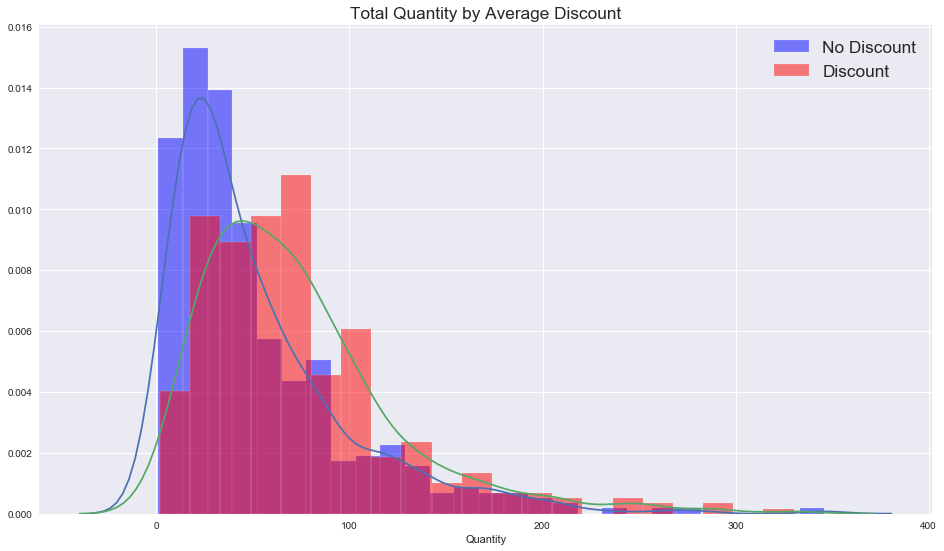

In [12]:
plt.style.use('seaborn')
plt.figure(figsize=(16, 9))
sns.distplot(A, hist_kws={ 'color':'blue', 'alpha':0.5, 'label':'No Discount'})
sns.distplot(B, hist_kws={ 'color':'red', 'alpha':0.5, 'label':'Discount'})
plt.legend(fontsize='xx-large')
plt.title('Total Quantity by Average Discount', fontdict={'fontsize': 'xx-large'})
plt.xlabel('Quantity')
plt.show()

## 1.d Analysis

Since we have 2 samples, one varible, and do not know the population variance, we will use a parametric `Two-Sample TTest` to determine if discount on an order has a significant effect on the quantity of a product ordered. We will perform a Levene Test to see if both samples are from the same population with equal variances, before moving forward. If we reject the Levene Test null, we will use the non-parametric, Mann-Whitney Test; and if we fail to reject the Levene Test null, we will use a Two-Sample T-Test. 

In [13]:
stats.levene(A,B)

LeveneResult(statistic=1.9179524407508215, pvalue=0.16645558467542218)

- The Levene test, tests the null hypothesis that all input samples are from populations with equal variances. The p_value of 0.166 is statistically insignificant, and shows at that input samples are from a population with equal variances. We do not have enough evidence to reject the null hypothesis for Levene's test, so we will move forward with a parametric Two_Sample T-Test to determine if discount on an order has a significant effect on the quantity of a product ordered. 

#### Two Sample T-TEST

In [14]:
t.stats.ttest_ind(A,B)

Ttest_indResult(statistic=-5.91731561103876, pvalue=4.7876655924928625e-09)

* We have significant evidence to reject our null, since discounts has a significant impact on quantity ordered. We will use a two sample Cohen's D test to assess the effect size of this test statistic. 

#### Two Sample Cohen's D Test

In [15]:
effect_size = t.two_samp.cohens_d_two_samp(A,B)
effect_size

-0.4122548036363552

* With a Cohen's D value of `.4`, we can see that the discount has a small effect on quantity.

In [16]:
effect_size, nobs, alpha = effect_size, A.shape[0], 0.05
power = tt_ind_solve_power(effect_size=effect_size, nobs1=nobs, alpha=0.05)
print('Power of effect:',power)

Power of effect: 1.0


* After a power analysis of of 100%, we are certain that we have a 0% chance of making a type II error.

## 1.e Results Summary

* Hypothesis Test
    * We reject the null hypothesis
    * This means that we ave significant evidence to reject the null hypothesis.
* Effect Size
    * The effect size of 0.4 is very small. This shows a small impact on quantity.
* Power Analysis
    * After a power analysis of of 100%, we are certain that we have a 0% chance of making a type II error, where we should have rejected the null but didn't. 

**Since there is a significant effect, at what levels of discounts does this occur?**

In [17]:
discount.discount = round(discount.discount,2)

* Here we rounded our discount levels in the dataFrame

In [18]:
discount.discount = discount.discount.astype('category')

* Here we converted the discount column to a category

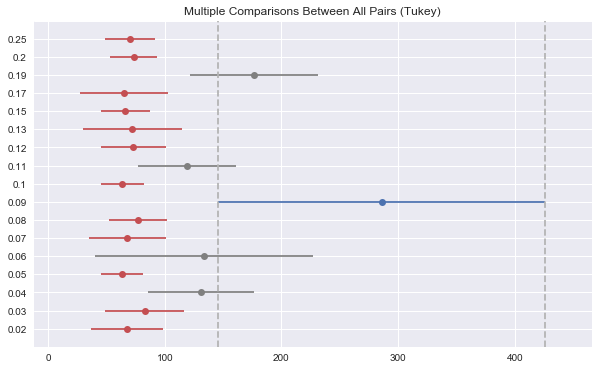

In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(discount['quantity'], discount['discount'],.05)
tukey_results.plot_simultaneous(comparison_name=0.09);

* Here we used the tukey's pair wise comparison to show which discount amount has the most significant impact on quantity ordered. We see that around 9% percent discount yields higher quantities on average across all historic orders.

## 1.f Recommendation

On average, customers order quantinty increases at around 9%. Our recommendation around order discounts would be to create a campaign for 9% discounts to current and future customers in the selected area of expansion. This targeted campaign will significantly increase order quantity, in any new regions or territories of expansion.

[Top](#Table-of-Contents)


# 2. Second Question

# *Are US employees generating the same profit on average as UK employees?*

## Hypothesis Test

* H0 = AVG US employee sales = AVG employee sales in UK
* H1 = AVG US employee sales != AVG employee sales in UK

In [20]:
conn = sqlite3.Connection(data)
cur = conn.cursor()
cur.execute(
"""
SELECT od.OrderID, o.EmployeeId, e.Title,e.Region,e.Country,p.ProductName,od.Quantity, od.UnitPrice as RetailPrice, Freight as CostofGoods,od.Discount,AVG(od.UnitPrice*od.Quantity) as AVG_Revenue, AVG((od.UnitPrice*od.Quantity)-Freight) as AVG_Profit
FROM [Order] o
Join OrderDetail od
ON o.Id = od.OrderID
JOIN Employee e
ON o.EmployeeId = e.Id
Join Product p
ON od.ProductId = p.Id
GROUP BY od.OrderID

""")
orders_with_employees = pd.DataFrame(cur.fetchall())
orders_with_employees.columns = [x[0] for x in cur.description]
orders_with_employees.columns

Index(['OrderId', 'EmployeeId', 'Title', 'Region', 'Country', 'ProductName',
       'Quantity', 'RetailPrice', 'CostofGoods', 'Discount', 'AVG_Revenue',
       'AVG_Profit'],
      dtype='object')

In [21]:
orders_with_employees.Country.unique()

array(['UK', 'USA'], dtype=object)

In [22]:
orders_with_employees.EmployeeId.nunique()

9

In [23]:
orders_with_employees[orders_with_employees.Country=='USA'].EmployeeId.nunique()

5

In [24]:
orders_with_employees[orders_with_employees.Country=='UK'].EmployeeId.nunique()

4

## Sampling

In [25]:
usa = orders_with_employees[orders_with_employees.Country=='USA'].AVG_Profit

In [26]:
uk = orders_with_employees[orders_with_employees.Country=='UK'].AVG_Profit

In [27]:
len(usa), len(uk)

(606, 224)

## Visualizing the Sample Distribution

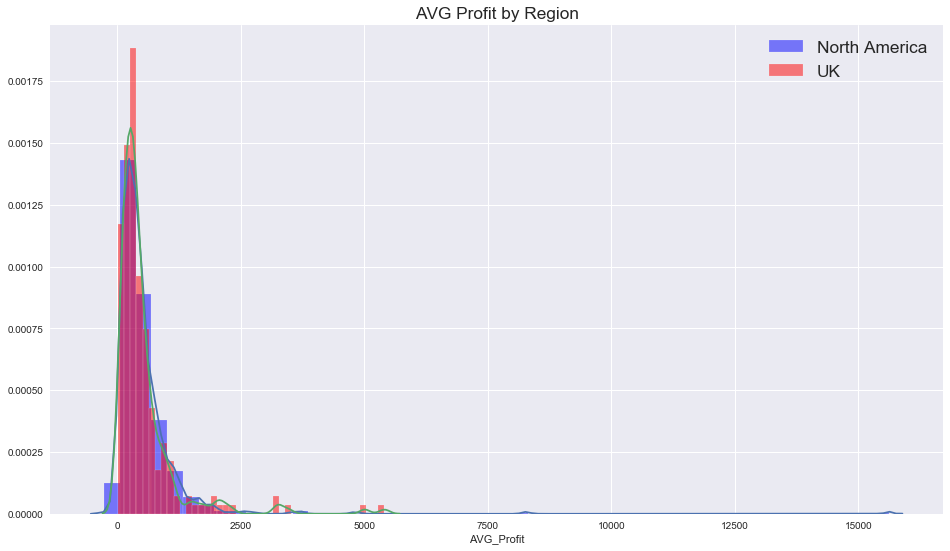

In [28]:
plt.style.use('seaborn')
plt.figure(figsize=(16, 9))
sns.distplot(usa, hist_kws={ 'color':'blue', 'alpha':0.5, 'label':'North America'})
sns.distplot(uk, hist_kws={ 'color':'red', 'alpha':0.5, 'label':'UK'})
plt.legend(fontsize='xx-large')
plt.title('AVG Profit by Region', fontdict={'fontsize': 'xx-large'})
plt.show()

## Analysis
Since we have have 2 samples, one varible, and do not know the population variance, we will perform a Levene Test to see if both samples are from the same population with equal variances. If we reject the nul, we will use the non-parametric, Mann-Whitney Test; and if we fail to reject the null, we will use a Two-Sample T-Test. 

In [29]:
stats.levene(usa,uk)

LeveneResult(statistic=0.011066634958648208, pvalue=0.9162441164298951)

* The Levene test tests the null hypothesis that all input samples are from populations with equal variances. The p_value is statistically insignificant, and shows at that input samples are from a population with equal variances. We do not have enough evidence to reject the null hypothesis for Levene's test, so we will move forward with a parametric Two_Sample T-Test, but before we move forward, let's do a KS Test to check for normal distribution.

In [30]:
t.stats.ks_2samp(usa,uk)

Ks_2sampResult(statistic=0.0658003300330033, pvalue=0.4547582625565251)

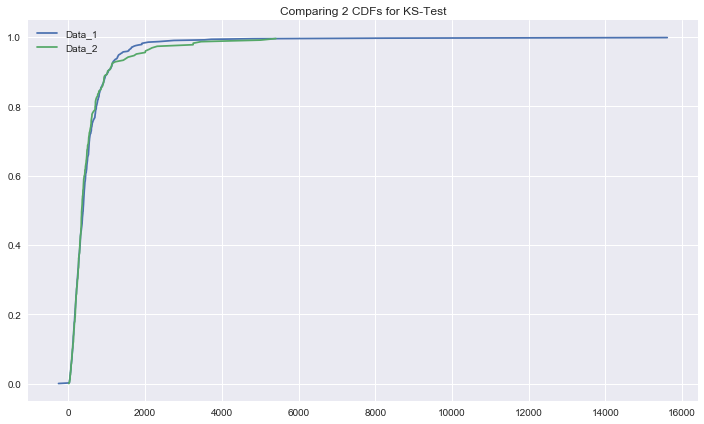

In [31]:
t.two_samp.ks_plot_2sample(usa,uk)

* The Cummulative Distribution Functions for both samples are closely aligned, confirming normality for the Two-Sample T-Test.

In [32]:
stats.ttest_ind(usa,uk)

Ttest_indResult(statistic=-0.0800294652261829, pvalue=0.9362331594416462)

* The p_value of 0.936 is statistically insignificant and lacks the evidence to reject the null hypothesis.

In [33]:
effect_size = t.two_samp.cohens_d_two_samp(usa,uk)
effect_size

-0.006257900300692055

* This effect size of 0 has a very small influence on average sales between groups

In [34]:
effect_size, nobs, alpha = effect_size, usa.shape[0], 0.05
power = tt_ind_solve_power(effect_size=effect_size, nobs1=nobs, alpha=0.05)
power

0.05135820587504291

* This shows our beta, or power, at only 50%; which is too low to be significant. 

## 2.e Results Summary

## Summary

* Hypothesis Test
    * We fail to reject the null hypothesis
    * This means that we do not have significant evidence to reject the null hypothesis.
* Effect Size
    * The effect size of 0 is very small. This shows no difference in average sales between US and UK teams.
* Power Analysis
    * After a power analysis, we are about only 50% certain of making a Type II error; where we should have rejected the null but didn't.

## 2.f Recommendation

On average, we do not see a significant difference in profit generatation between countries. Our recommendation would be to expand offices in other regions to replicate the profit generated from teams in the US and the UK.

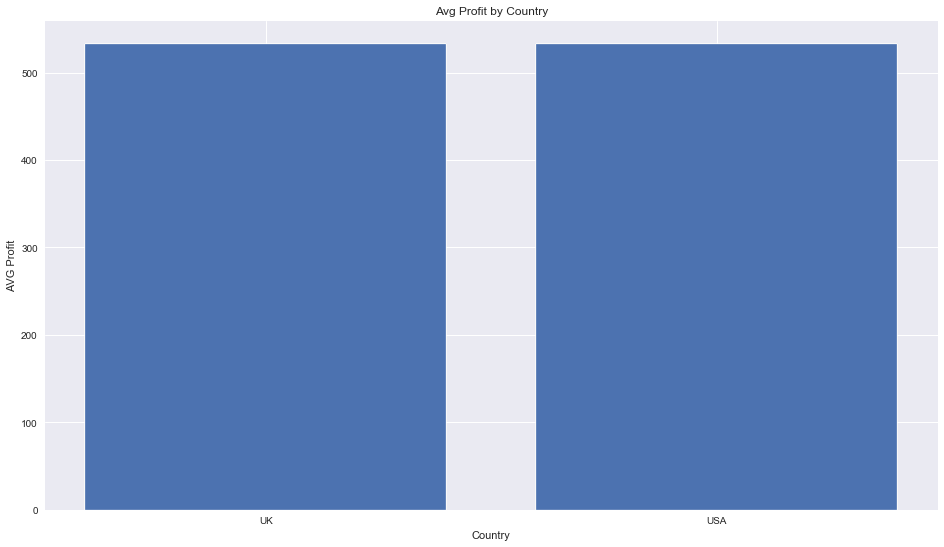

In [35]:
plt.style.use('seaborn')
plt.figure(figsize=(16, 9))
plt.bar(orders_with_employees.Country,orders_with_employees.AVG_Profit.mean())
plt.title('Avg Profit by Country')
plt.xlabel('Country')
plt.ylabel('AVG Profit')
plt.show()

[Top](#Table-of-Contents)


# 3. Third Question
# *On average, are our teams generating more profit from inside sales or outside sales in the US?*

## 3.a Hypothesis Test

* H0 = North America regions performs equally to all other regions
* H1 = North america regions do not perform equally to all other regions

In [36]:
orders_with_employees.Title.unique()

array(['Sales Manager', 'Sales Representative',
       'Inside Sales Coordinator', 'Vice President, Sales'], dtype=object)

In [37]:
OwE = orders_with_employees[orders_with_employees.Country=='USA']

## 3.b Sampling

In [38]:
outside_sales = OwE[OwE.Title=='Sales Representative'].AVG_Profit

In [39]:
inside_sales = OwE[OwE.Title=='Inside Sales Coordinator'].AVG_Profit

In [40]:
len(outside_sales), len(inside_sales)

(406, 104)

## 3.c Visualizing the Sample Distribution

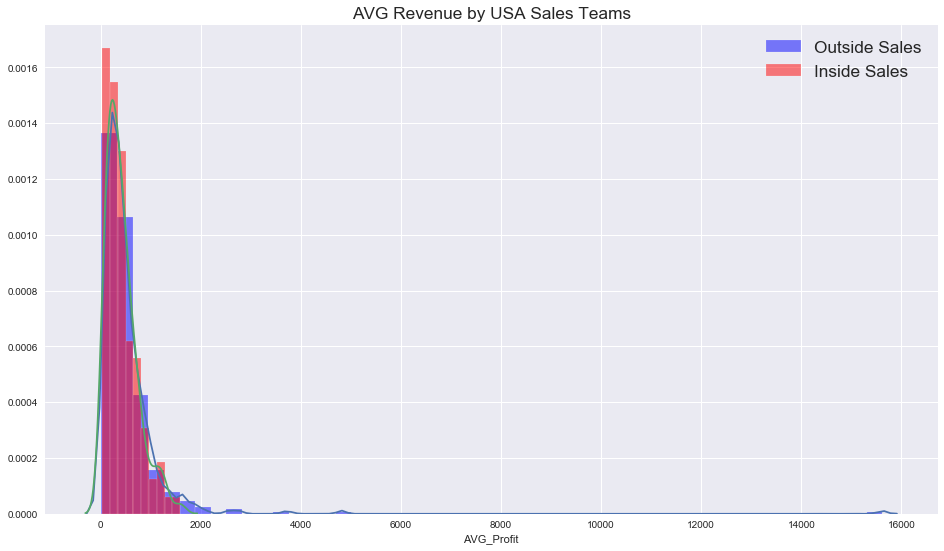

In [41]:
plt.style.use('seaborn')
plt.figure(figsize=(16, 9))
sns.distplot(outside_sales, hist_kws={ 'color':'blue', 'alpha':0.5, 'label':'Outside Sales'})
sns.distplot(inside_sales, hist_kws={ 'color':'red', 'alpha':0.5, 'label':'Inside Sales'})
plt.legend(fontsize='xx-large')
plt.title('AVG Revenue by USA Sales Teams', fontdict={'fontsize': 'xx-large'})
plt.show()

## 3.d Analysis
Since we have have 2 samples, one varible, and do not know the population variance, we will perform a Levene Test to see if both samples are from the same population with equal variances. If we reject the nul, we will use the non-parametric, Mann-Whitney Test; and if we fail to reject the null, we will use a Two-Sample T-Test. 

In [42]:
stats.levene(outside_sales,inside_sales)

LeveneResult(statistic=1.2534068958862432, pvalue=0.2634318302086862)

* The Levene test tests the null hypothesis that all input samples are from populations with equal variances. The p_value of 0.47 is statistically significant, and shows at that input samples are not from a population with equal variances. We have enough evidence to reject the null hypothesis for Levene's test, so we will move forward with the non-parametric Mann-Whitney Test, but before we move forward, let's do a KS Test to check for normal distribution.

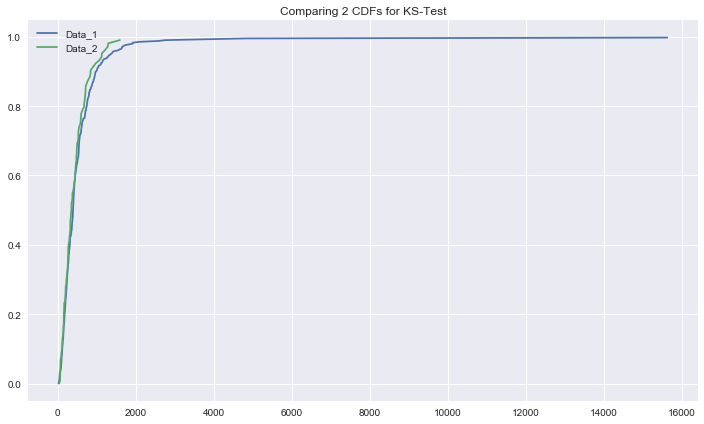

In [43]:
t.two_samp.ks_plot_2sample(outside_sales,inside_sales)

* The Cummulative Distribution Functions for both samples are not very aligned, confirming non-normality for the Mann-Whitney Test.

In [44]:
stats.mannwhitneyu(outside_sales,inside_sales)

MannwhitneyuResult(statistic=19638.0, pvalue=0.13591000835776512)

* The p_value of 0.1359 does not provide statistically significant between the average profit generated by outside and inside teams. We do not have significant evidence to reject the null hypothesis.

In [45]:
effect_size = t.two_samp.cohens_d_two_samp(outside_sales,inside_sales)
effect_size

0.13958037500349368

* This effect size of .13958 has a small influence on average revenue between teams

In [46]:
effect_size, nobs, alpha = effect_size, outside_sales.shape[0], 0.05
power = tt_ind_solve_power(effect_size=effect_size, nobs1=nobs, alpha=0.05)
power

0.5105673652520101

* This shows our beta, or power, at almost 51%; which is too low to be significant. 

## 3.e Results Summary

## Summary

* Hypothesis Test
    * We reject the null hypothesis
    * This means that we have significant evidence to reject the null hypothesis.
* Effect Size
    * The effect size for almost all combinations of regions and the total units was very small or medium.
* Power Analysis
    * After a power analysis, we are 51% certain of making a Type II error; where we should have rejected the null but didn't.

## 3.f Recommendation

* On average, we do not see a significant difference in revenue generatation between inside and outside teams. Our recommendation would be to expand teams in other regions to replicate the profit generated from inside and outside sales in the US and the UK.

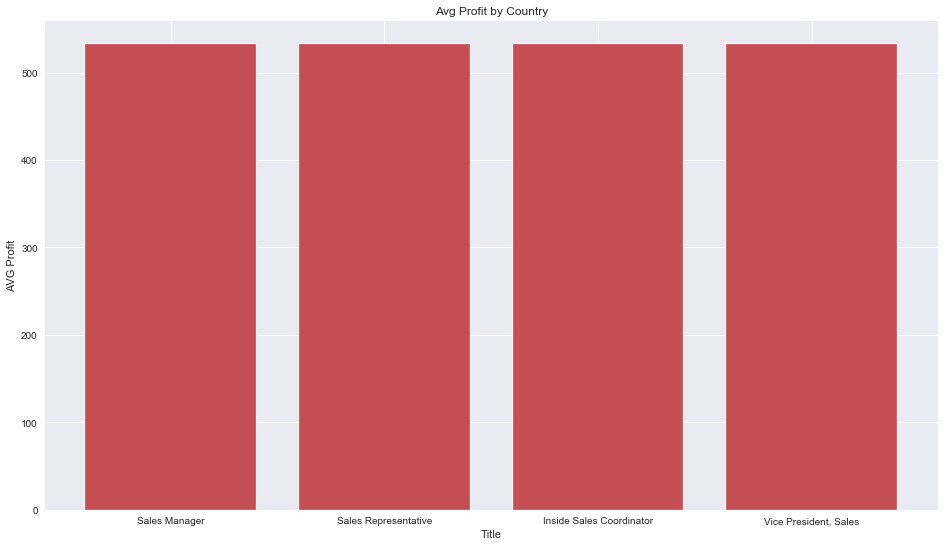

In [47]:
plt.style.use('seaborn')
plt.figure(figsize=(16, 9))
plt.bar(orders_with_employees.Title,orders_with_employees.AVG_Profit.mean(),color='r')
plt.title('Avg Profit by Country')
plt.xlabel('Title')
plt.ylabel('AVG Profit')
plt.show()

[Top](#Table-of-Contents)


# 4. Final Question

# *Are all employees generating equal revenue over time?*

## 4.a Hypothesis Test

* H0 = Average employee revenue per order is equal across individual employees
* H1 = Average employee revenue per order is not equal across individual employees

In [48]:
cur.execute(
"""
SELECT od.OrderID, o.OrderDate,o.EmployeeId, e.Title,e.Region,e.Country,p.ProductName,od.Quantity, od.UnitPrice as RetailPrice, Freight as CostofGoods,od.Discount,AVG(od.UnitPrice*od.Quantity) as AVG_Revenue, AVG((od.UnitPrice*od.Quantity)-Freight) as AVG_Profit
FROM [Order] o
Join OrderDetail od
ON o.Id = od.OrderID
JOIN Employee e
ON o.EmployeeId = e.Id
Join Product p
ON od.ProductId = p.Id
GROUP BY od.OrderID

""")
orders_with_employees = pd.DataFrame(cur.fetchall())
orders_with_employees.columns = [x[0] for x in cur.description]
orders_with_employees.columns

Index(['OrderId', 'OrderDate', 'EmployeeId', 'Title', 'Region', 'Country',
       'ProductName', 'Quantity', 'RetailPrice', 'CostofGoods', 'Discount',
       'AVG_Revenue', 'AVG_Profit'],
      dtype='object')

In [49]:
orders_with_employees.head()

,OrderId,OrderDate,EmployeeId,Title,Region,Country,ProductName,Quantity,RetailPrice,CostofGoods,Discount,AVG_Revenue,AVG_Profit
0,10248,2012-07-04,5,Sales Manager,British Isles,UK,Queso Cabrales,12,14.0,32.38,0.00,146.666667,114.286667
1,10249,2012-07-05,6,Sales Representative,British Isles,UK,Tofu,9,18.6,11.61,0.00,931.700000,920.090000
2,10250,2012-07-08,4,Sales Representative,North America,USA,Jack's New England Clam Chowder,10,7.7,65.83,0.00,604.333333,538.503333
3,10251,2012-07-08,3,Sales Representative,North America,USA,Gustaf's Knäckebröd,6,16.8,41.34,0.05,223.600000,182.260000
4,10252,2012-07-09,4,Sales Representative,North America,USA,Sir Rodney's Marmalade,40,64.8,51.30,0.05,1243.333333,1192.033333


In [50]:
orders_with_employees['OrderDate'] =  pd.to_datetime(orders_with_employees['OrderDate'], format='%Y-%m-%d')
orders_with_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 13 columns):
OrderId        830 non-null int64
OrderDate      830 non-null datetime64[ns]
EmployeeId     830 non-null int64
Title          830 non-null object
Region         830 non-null object
Country        830 non-null object
ProductName    830 non-null object
Quantity       830 non-null int64
RetailPrice    830 non-null float64
CostofGoods    830 non-null float64
Discount       830 non-null float64
AVG_Revenue    830 non-null float64
AVG_Profit     830 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(3), object(4)
memory usage: 84.4+ KB


In [51]:
owe = orders_with_employees.groupby(['OrderDate','EmployeeId'])['AVG_Profit'].mean()
owe2 = round(owe.unstack().fillna(0),2)
owe2

EmployeeId,1,2,3,4,5,6,7,8,9
OrderDate,,,,,,,,,
2012-07-04,0.00,0.00,0.00,0.00,114.29,0.00,0.00,0.00,0.00
2012-07-05,0.00,0.00,0.00,0.00,0.00,920.09,0.00,0.00,0.00
2012-07-08,0.00,0.00,182.26,538.50,0.00,0.00,0.00,0.00,0.00
2012-07-09,0.00,0.00,0.00,1192.03,0.00,0.00,0.00,0.00,0.00
2012-07-10,0.00,0.00,423.43,0.00,0.00,0.00,0.00,0.00,0.00
2012-07-11,0.00,0.00,0.00,0.00,185.42,0.00,0.00,0.00,0.00
2012-07-12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,474.29
2012-07-15,0.00,0.00,244.93,0.00,0.00,0.00,0.00,0.00,0.00
2012-07-16,0.00,0.00,0.00,291.39,0.00,0.00,0.00,0.00,0.00


## Sampling

In [52]:
nancy = owe2[1]
andrew = owe2[2]
janet = owe2[3]
margaret = owe2[4]
steven = owe2[5]
michael = owe2[6]
robert = owe2[7]
laura = owe2[8]
anne = owe2[9]

## Visualizing the Sample Distribution

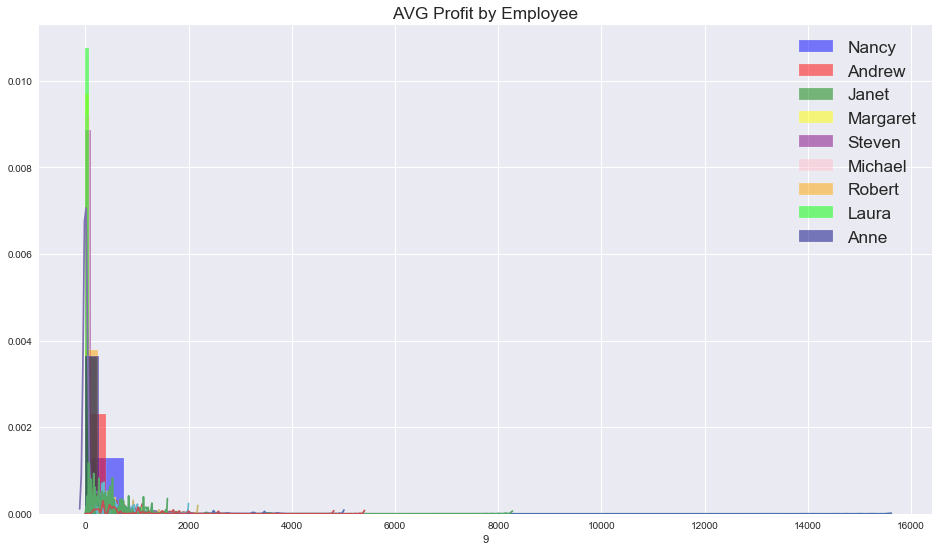

In [53]:
plt.style.use('seaborn')
plt.figure(figsize=(16, 9))
sns.distplot(nancy, hist_kws={ 'color':'blue', 'alpha':0.5, 'label':'Nancy'})
sns.distplot(andrew, hist_kws={ 'color':'red', 'alpha':0.5, 'label':'Andrew'})
sns.distplot(janet, hist_kws={ 'color':'green', 'alpha':0.5, 'label':'Janet'})
sns.distplot(margaret, hist_kws={ 'color':'yellow', 'alpha':0.5, 'label':'Margaret'})
sns.distplot(steven, hist_kws={ 'color':'purple', 'alpha':0.5, 'label':'Steven'})
sns.distplot(michael, hist_kws={ 'color':'pink', 'alpha':0.5, 'label':'Michael'})
sns.distplot(robert, hist_kws={ 'color':'orange', 'alpha':0.5, 'label':'Robert'})
sns.distplot(laura, hist_kws={ 'color':'lime', 'alpha':0.5, 'label':'Laura'})
sns.distplot(anne, hist_kws={ 'color':'navy', 'alpha':0.5, 'label':'Anne'})
plt.legend(fontsize='xx-large')
plt.title('AVG Profit by Employee', fontdict={'fontsize': 'xx-large'})
plt.show()

## Analysis
Since we have have 9 samples, one varible, and do not know the population variance of this non-norm distribution, we will use a Non-Parametric Kruskal Wallis Test. We will make the assumption that all employees will generate the same average profit per order per day, as stated in the null hypothesis. 

In [54]:
stats.levene(nancy,andrew,janet,margaret,steven,
             michael,robert,laura, anne)

LeveneResult(statistic=4.911511270462592, pvalue=4.627369633477924e-06)

* The Levene test tests the null hypothesis that all input samples are from populations with equal variances. The p_value is statistically significant, and shows at that input samples are not from a population with equal variances. We have enough evidence to reject the null hypothesis for Levene's test, so we will move forward with the non-parametric Kruskal Wallis Test.

In [55]:
stats.kruskal(nancy,andrew,janet,margaret,steven,
             michael,robert,laura, anne)


KruskalResult(statistic=134.29526849057228, pvalue=3.6361121814939358e-25)

* The p_value is statistically significant and shows at least one difference between employee average profit generation over time. We have evidence to reject the null hypothesis based on the Kruskal Wallis non-parametric test.

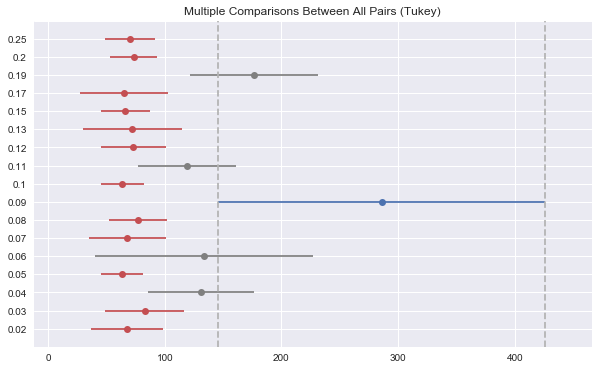

In [56]:
tukey_results.plot_simultaneous(comparison_name=.09);

## 4.e Results Summary

* Hypothesis Test
    * We reject the null hypothesis
    * This means that we have significant evidence to reject the null hypothesis.
* Effect Size
    * The effect size for almost all combinations of regions and the total units was very small or medium.
* Power Analysis
    * After a power analysis, we are 100% certain of making a Type II error; where we should have rejected the null but didn't.

## 4.f Recommendation

In [57]:
orders_with_employees.groupby(['EmployeeId'])['AVG_Profit'].mean().sort_values(ascending=False)

EmployeeId
9    644.095240
2    637.758411
7    630.305081
1    581.665866
3    531.489157
4    499.752063
5    480.908214
8    421.831314
6    401.553619
Name: AVG_Profit, dtype: float64

* On an average day, we see significant difference in average profit generatation between employees. Our recommendation would be to promote Anne Dodsworth from Sales Representative to Sales Manager for new regions to replicate her daily profit average of roughly $645 per day, in her past experiene in the British Isles, UK.

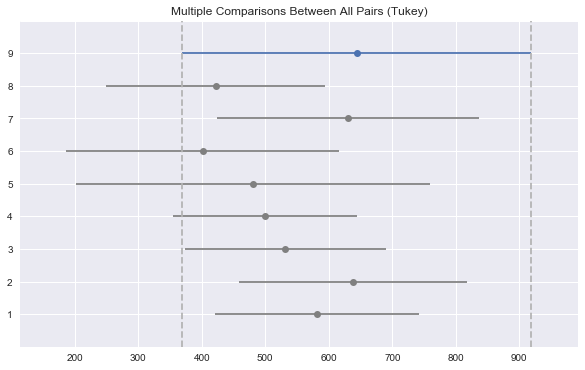

In [58]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(orders_with_employees['AVG_Profit'], orders_with_employees['EmployeeId'],.05)
tukey_results.plot_simultaneous(comparison_name=9);

In [59]:
cur.execute(
"""
SELECT e.FirstName,e.LastName, e.Id, e.Title, e.Region, e.Country
From Employee e

""")
employees = pd.DataFrame(cur.fetchall())
employees.columns = [x[0] for x in cur.description]
employees.columns
employees

,FirstName,LastName,Id,Title,Region,Country
0,Nancy,Davolio,1,Sales Representative,North America,USA
1,Andrew,Fuller,2,"Vice President, Sales",North America,USA
2,Janet,Leverling,3,Sales Representative,North America,USA
3,Margaret,Peacock,4,Sales Representative,North America,USA
4,Steven,Buchanan,5,Sales Manager,British Isles,UK
5,Michael,Suyama,6,Sales Representative,British Isles,UK
6,Robert,King,7,Sales Representative,British Isles,UK
7,Laura,Callahan,8,Inside Sales Coordinator,North America,USA
8,Anne,Dodsworth,9,Sales Representative,British Isles,UK


[Top](#Table-of-Contents)


# 5. Future Work
This will conclude our audit, below we will wrap up our findings and recommendations shared with the leadership and key stakeholders. We have also included additional areas of research for your stakeholders, as we hope to share future work that could be beneficial to the company's board of directors.

Here are the decisions we recommend based on the questions within the scope of this research:

- <b>Initial Question:</b> *Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?*
    * On average, customers order quantity increases at around 9%. Our recommendation around order discounts would be to create a campaign for 9% discounts to current and future customers in the selected area of expansion. This targeted campaign will significantly increase order quantity, in any new regions or territories of expansion.
- <b>Second Question:</b> *Are US employees generating the same profit on average as UK employees?*
    * On average, we do not see a significant difference in profit generation between countries. Our recommendation would be to expand offices in other regions to replicate the profit generated from teams in the US and the UK.  
- <b>Third Question:</b> *On average, are our teams generating more profit from inside sales or outside sales in the US?*
    * On average, we do not see a significant difference in revenue generatation between inside and outside teams. Our recommendation would be to expand teams in other regions to replicate the profit generated from inside and outside sales in the US and the UK.
- <b>Final Question:</b> *Are all employees generating equal revenue over time?*
    * On an average day, we see significant difference in average profit generatation between employees. Our recommendation would be to promote Anne Dodsworth from Sales Representative to Sales Manager for new regions to replicate her daily profit average of roughly $645 per day, in her past experience in the British Isles, UK.


Below are our reccommendations for **Future Work**:

## 5.a Recommendation 1

* Just like we analyzed **Employee Performance** for expansion, we can also look at **Product Performance** to share which products may have a significant impact on average profit per order, before going into uncharted regions. Given the results from our discount campaigns recommendation, the products with significant impact will help new teams and new leadership increase average profit per order in new regions.

## 5.b Recommendation 2

* In addition to **Product Performance**, we can also analyze **Supplier Performance**. While the employees can lead sales, we can take another look at purchasing in order which suppliers product offerings have a significant effect on our average profit per order. This will allow leadership to cancel contracts with suppliers that yield a negative impact and replace those contracts with suppliers that yield positive impacts on profit per order. e correctly identified and articulated.

## 5.c Recommendation 3

* Finally, we can analyze **Shipper Performance**. While analyzing supplier performance can save money in purchasing, and analyzing product performance can help employee performance, by analyzing shipper performance, we can measure customer satisfaction. If we attribute an ontime order to the equivalent of a satisfied customer, we would be able to see which shippers have a significant impact on an average delayed in orders per day. This information will allow leadership to source different shipping companies, and also allow more opportunity current shippers without significant impacts on average daily delays. 

[Top](#Table-of-Contents)
